In [12]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib
!pip list

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 13 kB/s 
     |████████████████████████████████| 578.1 MB 6.7 kB/s 
     |████████████████████████████████| 578.1 MB 6.2 kB/s 
     |████████████████████████████████| 511.8 MB 25 kB/s 


Package                       Version
----------------------------- ----------------------
absl-py                       1.3.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.3
aiosignal                     1.3.1
alabaster                     0.7.12
albumentations                1.2.1
altair                        4.2.0
appdirs                       1.4.4
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.11.0
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.1
blis                          0.7.9
bokeh                         2.3.3
branca


gpu yu kullanıyor mı diye kontrol



In [13]:
import tensorflow as tf
import os

In [14]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [15]:
tf.config.list_physical_devices('GPU')

[]

drivedan dataseti çekme

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import numpy as np
from matplotlib import pyplot as plt

dataset dosya uzantısı

In [18]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/dataset')

Found 7200 files belonging to 24 classes.


In [19]:
data_iterator = data.as_numpy_iterator()

In [20]:
batch = data_iterator.next()

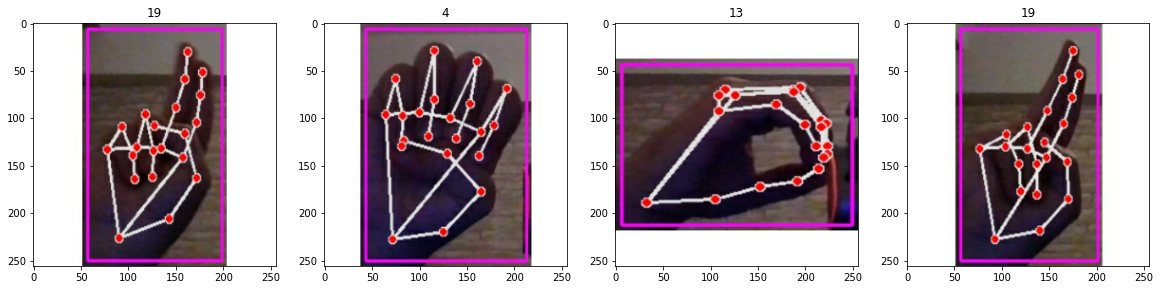

In [21]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

datayı boyutlandırma

In [22]:
data = data.map(lambda x,y: (x/255, y))

In [23]:
data.as_numpy_iterator().next()

(array([[[[0.999663  , 0.99641544, 1.        ],
          [0.99405634, 1.        , 1.        ],
          [0.9882353 , 1.        , 1.        ],
          ...,
          [1.        , 0.9809214 , 1.        ],
          [1.        , 0.98954767, 1.        ],
          [1.        , 0.99935496, 0.9928309 ]],
 
         [[0.9997499 , 0.9973396 , 0.99780416],
          [0.99532807, 1.        , 0.9959559 ],
          [0.9893885 , 1.        , 0.9959559 ],
          ...,
          [1.        , 0.9891489 , 1.        ],
          [0.99924964, 0.9955887 , 0.9984993 ],
          [0.9971407 , 0.9997499 , 0.99080884]],
 
         [[1.        , 1.        , 0.9882575 ],
          [0.9994234 , 1.        , 0.98175985],
          [0.9943934 , 1.        , 0.9799826 ],
          ...,
          [0.997117  , 0.998078  , 1.        ],
          [0.9957862 , 1.        , 0.99417895],
          [0.9889093 , 1.        , 0.9880682 ]],
 
         ...,
 
         [[0.99812275, 1.        , 0.97760415],
          [0.99607

data ayırma test train olarak

In [24]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)
train_size

157

In [25]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [26]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

deep learning modeli oluşturma

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [28]:
model = Sequential()

In [29]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 16)      

train

In [32]:
logdir='logs'

In [33]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [50]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
157/157 [==============================] - 308s 2s/step - loss: -15065488996433920.0000 - accuracy: 0.0410 - val_loss: -18178124810289152.0000 - val_accuracy: 0.0451
Epoch 2/20
157/157 [==============================] - 311s 2s/step - loss: -21484188771287040.0000 - accuracy: 0.0408 - val_loss: -25736882851676160.0000 - val_accuracy: 0.0507
Epoch 3/20
157/157 [==============================] - 310s 2s/step - loss: -29734230388899840.0000 - accuracy: 0.0408 - val_loss: -35508639972196352.0000 - val_accuracy: 0.0465
Epoch 4/20
157/157 [==============================] - 350s 2s/step - loss: -40065383377403904.0000 - accuracy: 0.0414 - val_loss: -46374952328232960.0000 - val_accuracy: 0.0437
Epoch 5/20
157/157 [==============================] - 306s 2s/step - loss: -52825039724085248.0000 - accuracy: 0.0404 - val_loss: -61009349014716416.0000 - val_accuracy: 0.0465
Epoch 6/20
157/157 [==============================] - 302s 2s/step - loss: -68154993479254016.0000 - accuracy: 0.04

plot perdormansı tahmin için

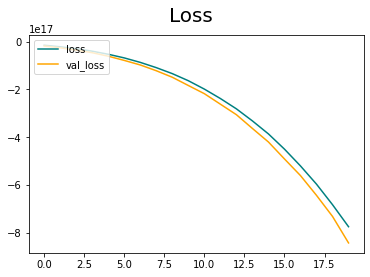

In [51]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Accuracy performansı

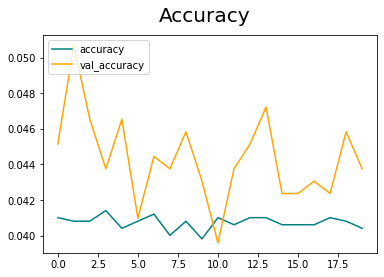

In [52]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

değerlendirme 

In [53]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [54]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [55]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 454ms/step


In [56]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.96164775, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.046875, shape=(), dtype=float32)


test kısmı

In [57]:
import cv2

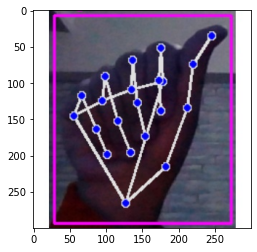

In [58]:
img = cv2.imread('drive/MyDrive/dataset/A/A (1).jpg')
plt.imshow(img)
plt.show()

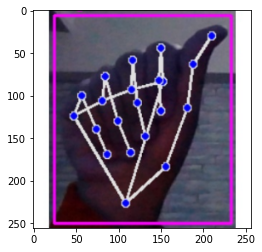

In [59]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [60]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 46ms/step


array([[1.]], dtype=float32)

In [61]:
if yhat > 0.5: 
    print(f'Predicted class is A')
else:
    print(f'Predicted class is not A')

Predicted class is A


dosyaları kaydetme

In [62]:
from tensorflow.keras.models import load_model

In [63]:
model.save(os.path.join('models','keras_model.h5'))

In [64]:
new_model = load_model('keras_model.h5')

OSError: ignored

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))